# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
from sklearn.preprocessing import OneHotEncoder,QuantileTransformer,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import set_config
from joblib import dump,load



import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
#from xgboost import XGBRegressor
#from sklearn.preprocessing import 

%matplotlib inline

In [2]:
df=pd.read_csv('C:\\Users\\Dear User\\Downloads\\TSLA.csv')

# DATA OVERVIEW

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
df.shape

(2416, 7)

In [6]:
#unique values in each column
dict_={}
for feature in df.columns:
    dict_[feature]=((df[feature].value_counts().shape[0]))
pd.DataFrame(dict_,index=['unique_counts']).transpose()

,unique_counts
Date,2416
Open,2132
High,2128
Low,2136
Close,2225
Adj Close,2225
Volume,2391


In [7]:
# Printing statistical information of the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [8]:
# percentage of missing values in each category
dict_={}
for feature in df.columns:
    dict_[feature]=((df[feature].isnull().sum())/len(df))*100
pd.DataFrame(dict_,index=['%age of missing value']).transpose()

,%age of missing value
Date,0.0
Open,0.0
High,0.0
Low,0.0
Close,0.0
Adj Close,0.0
Volume,0.0


# EDA

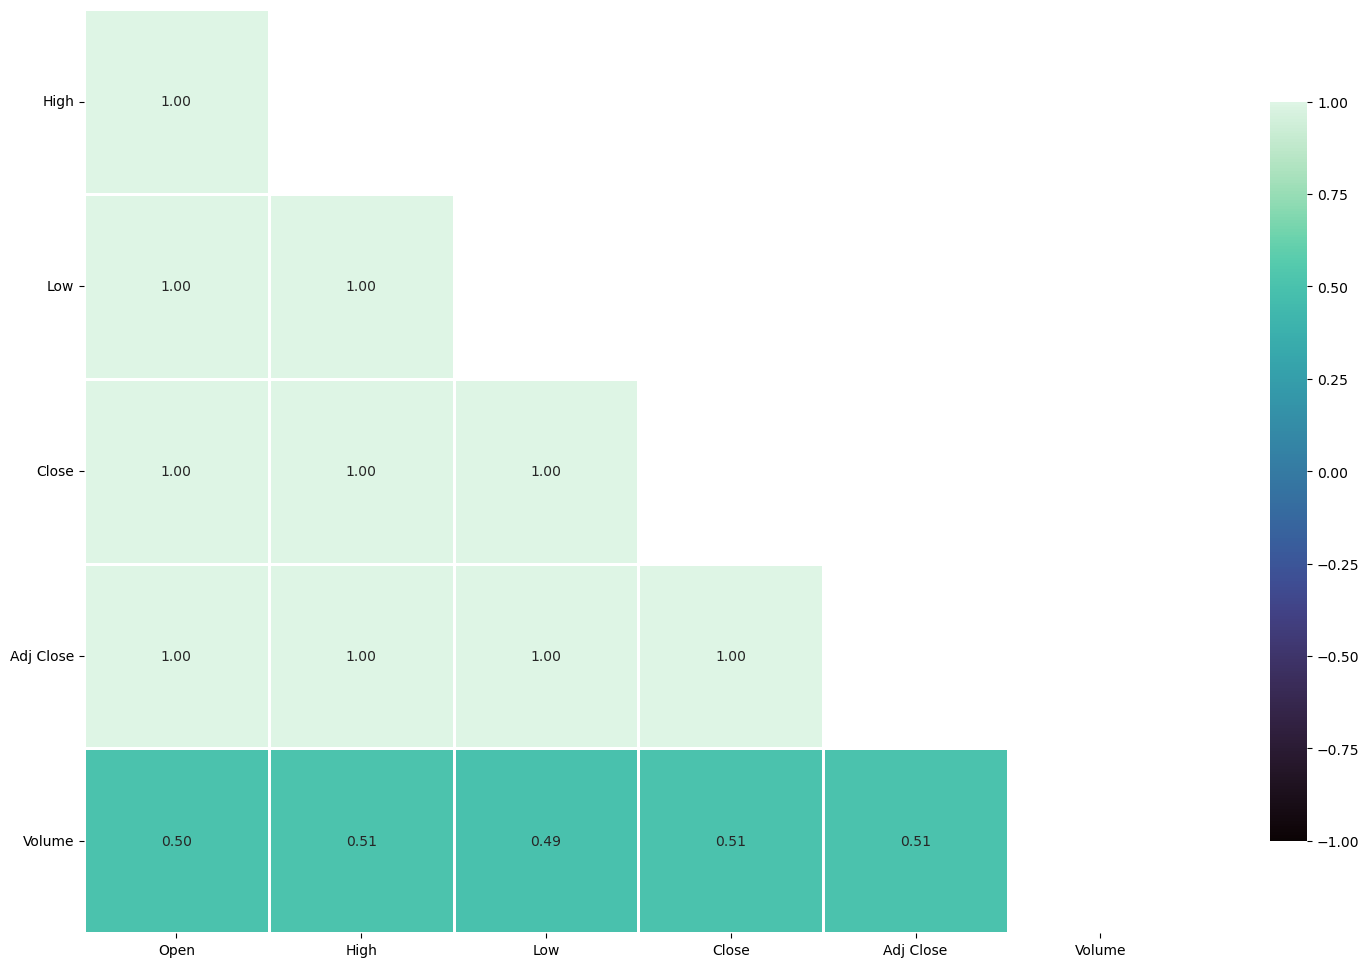

In [9]:
plt.figure(figsize=(20, 12))

dfCorr= df.corr()


mask = np.triu(np.ones_like(dfCorr, dtype=np.bool))
mask = mask[1:, :]


sns.heatmap(data=dfCorr.iloc[1:,:], vmin=-1, vmax=1, cbar_kws={"shrink": .8},annot=True, mask=mask,
            cmap='mako' ,square=True, linewidths=1, fmt=".2f")

plt.yticks(rotation=0)
plt.show()

In [10]:
# Dropping date column from our dataset

df = df.drop(['Date'],axis=1)

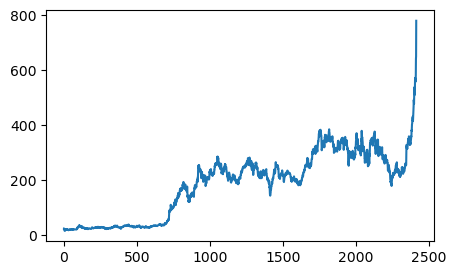

In [11]:
plt.figure(figsize=(5, 3))
df['Close'].plot()
plt.show()

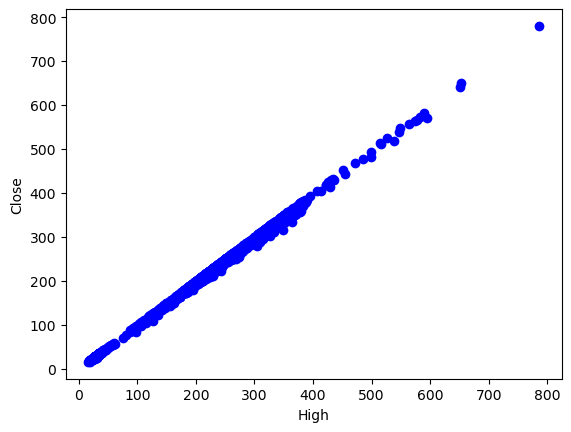

In [12]:
plt.scatter(df.High, df.Close,  color='blue')
plt.xlabel("High")
plt.ylabel("Close")
plt.show()

<Axes: xlabel='Volume', ylabel='Close'>

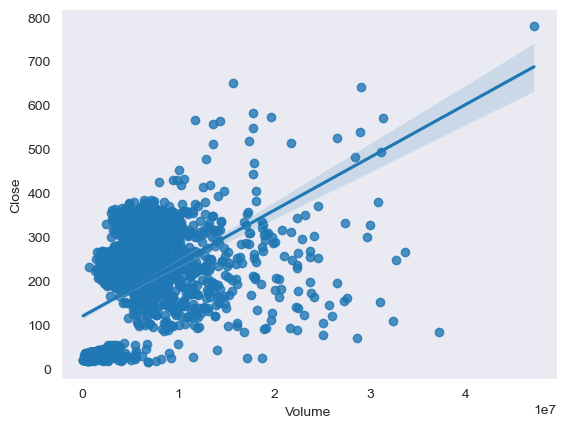

In [13]:
# Closing price vs the Volume
sns.set_style("dark")
sns.regplot(df,x='Volume',y='Close')

<Axes: xlabel='Open', ylabel='Close'>

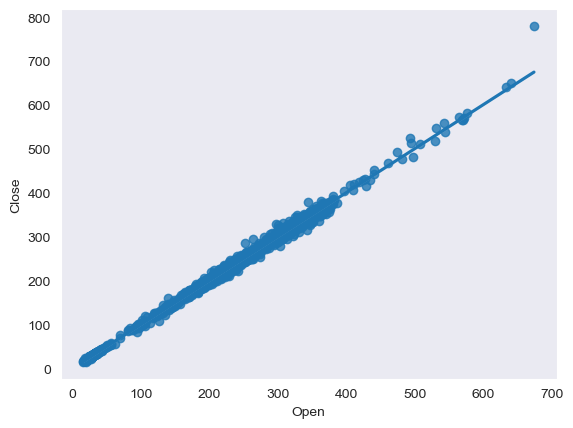

In [14]:
# Closing price vs the Open
sns.set_style("dark")
sns.regplot(df,x='Open',y='Close')

<Axes: xlabel='High', ylabel='Close'>

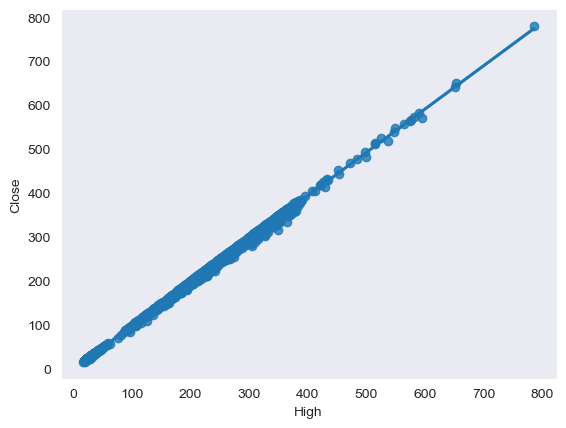

In [15]:
# Closing price vs the High
sns.set_style("dark")
sns.regplot(df,x='High',y='Close')

<Axes: xlabel='Low', ylabel='Close'>

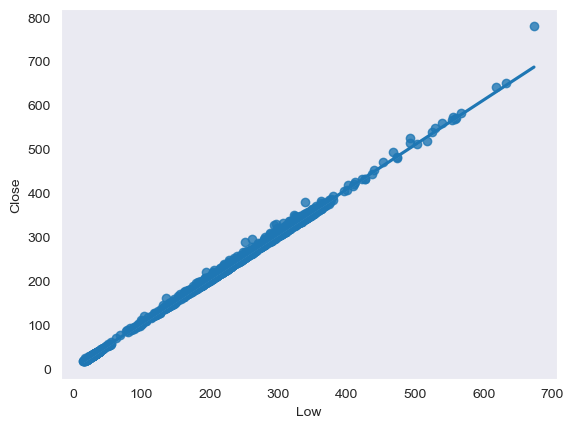

In [16]:
# Closing price vs the High
sns.set_style("dark")
sns.regplot(df,x='Low',y='Close')

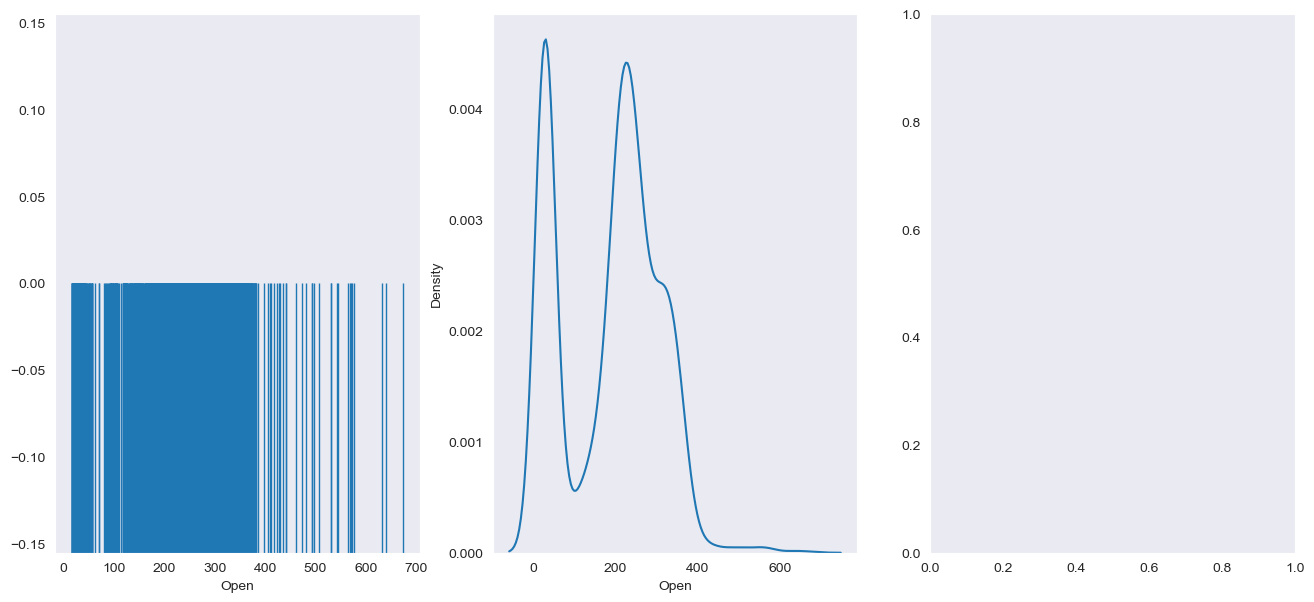

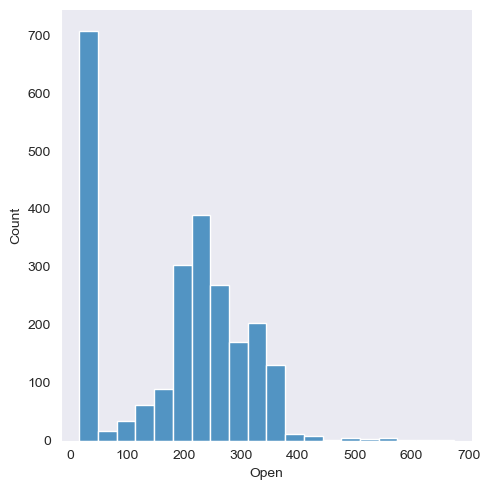

In [17]:
fig , axes = plt.subplots(1,3,figsize=(16,7))
sns.rugplot(ax = axes[0], data=df, x="Open", height=0.5)
sns.kdeplot(ax = axes[1], data=df, x="Open")
sns.displot(ax = axes[2], data=df, x="Open")

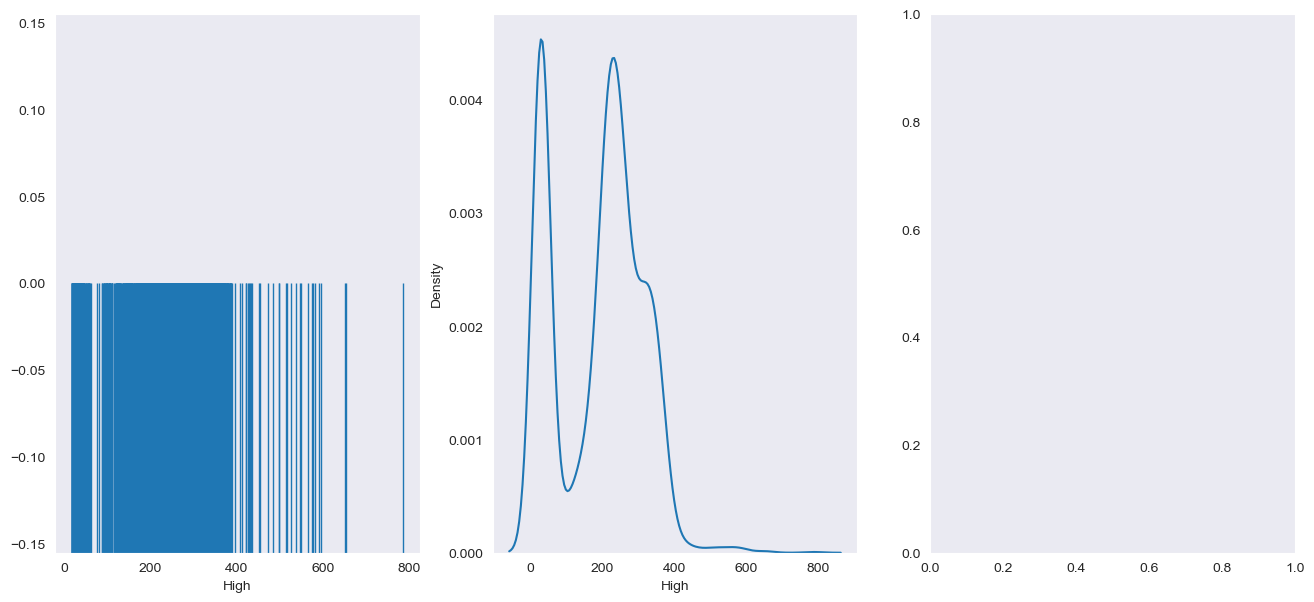

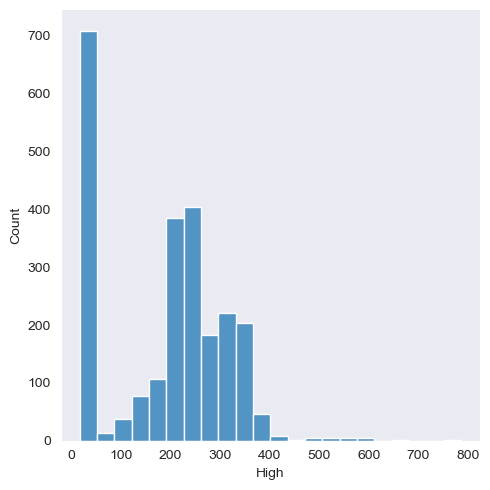

In [18]:
fig , axes = plt.subplots(1,3,figsize=(16,7))
sns.rugplot(ax = axes[0], data=df, x="High", height=0.5)
sns.kdeplot(ax = axes[1], data=df, x="High")
sns.displot(ax = axes[2], data=df, x="High")

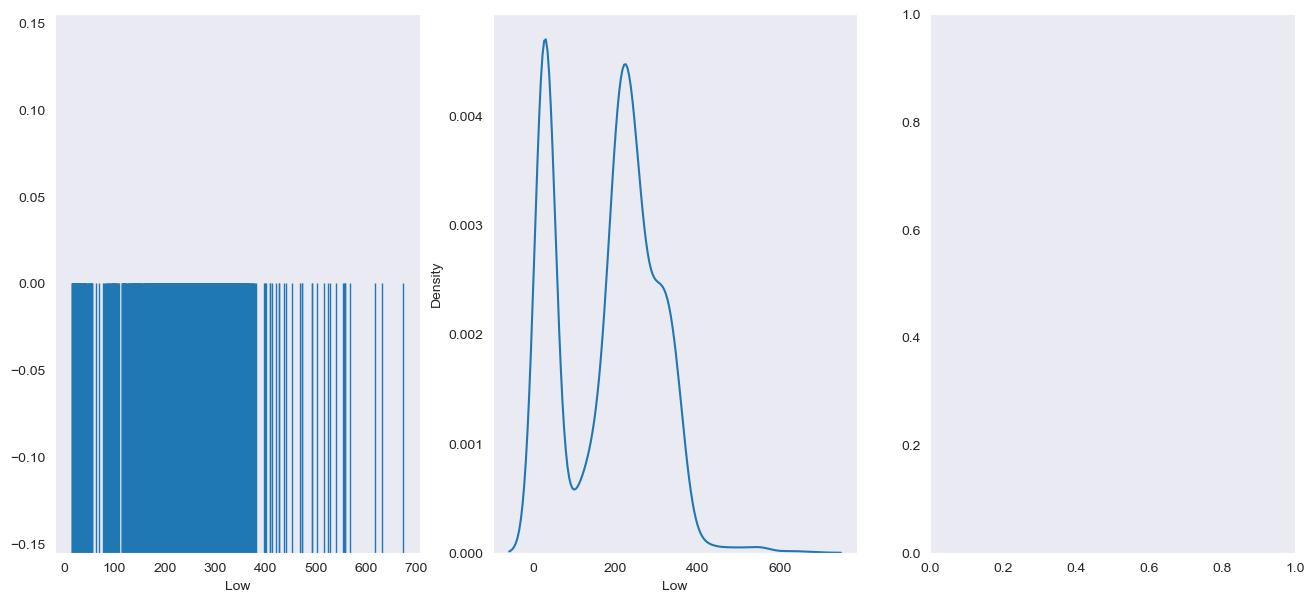

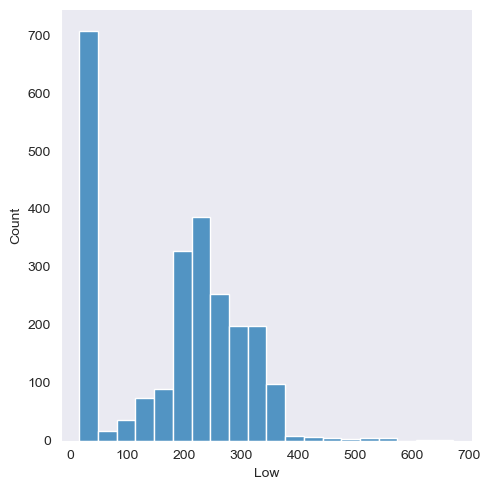

In [19]:
fig , axes = plt.subplots(1,3,figsize=(16,7))
sns.rugplot(ax = axes[0], data=df, x="Low", height=0.5)
sns.kdeplot(ax = axes[1], data=df, x="Low")
sns.displot(ax = axes[2], data=df, x="Low")

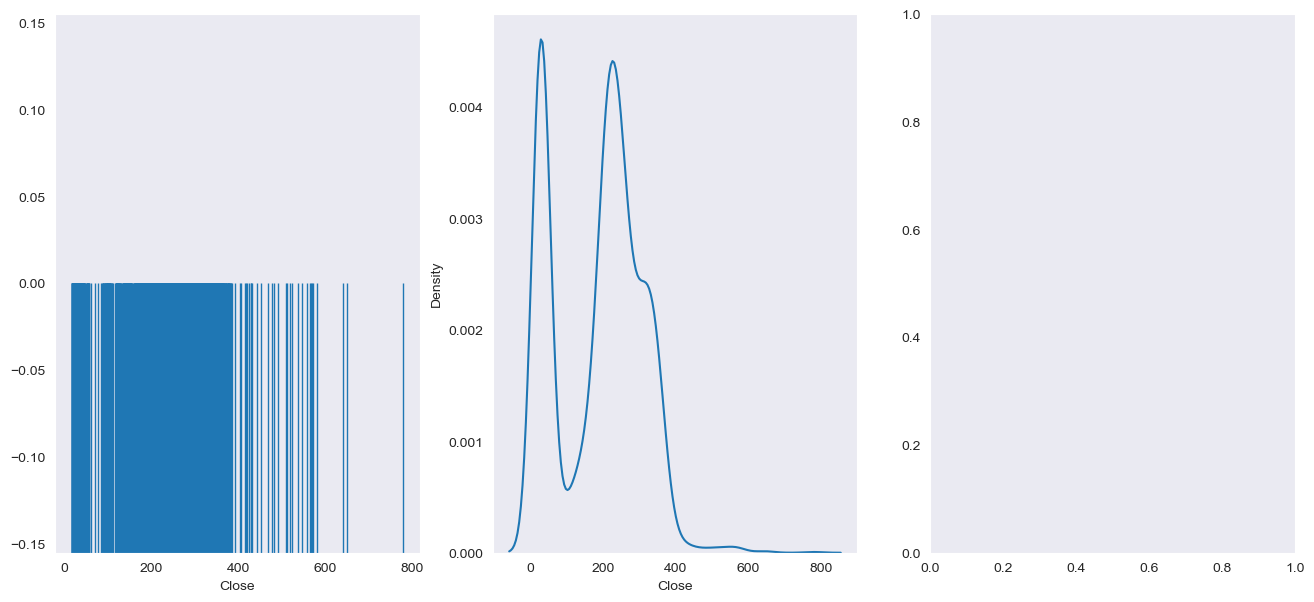

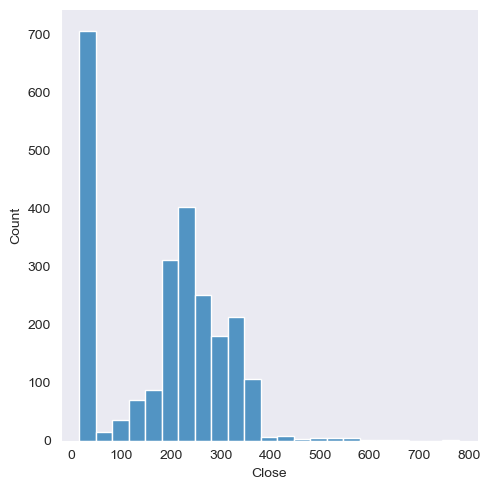

In [20]:
fig , axes = plt.subplots(1,3,figsize=(16,7))
sns.rugplot(ax = axes[0], data=df, x="Close", height=0.5)
sns.kdeplot(ax = axes[1], data=df, x="Close")
sns.displot(ax = axes[2], data=df, x="Close")

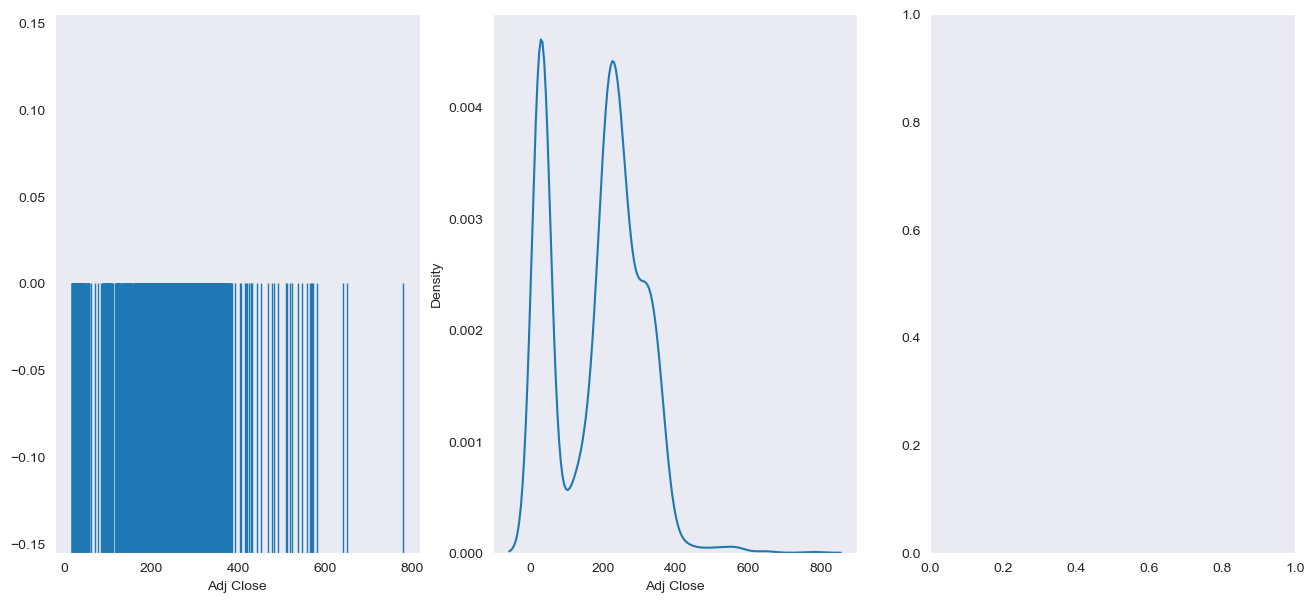

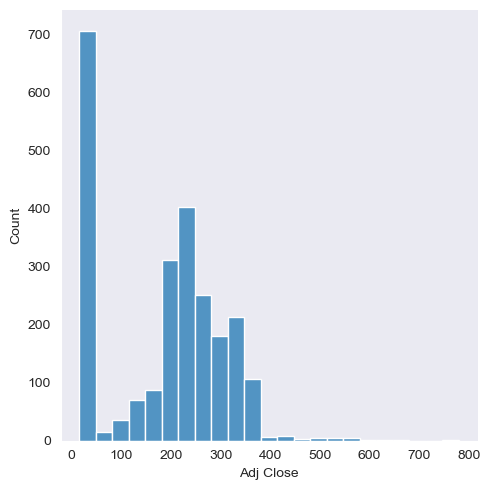

In [21]:
fig , axes = plt.subplots(1,3,figsize=(16,7))
sns.rugplot(ax = axes[0], data=df, x="Adj Close", height=0.5)
sns.kdeplot(ax = axes[1], data=df, x="Adj Close")
sns.displot(ax = axes[2], data=df, x="Adj Close")

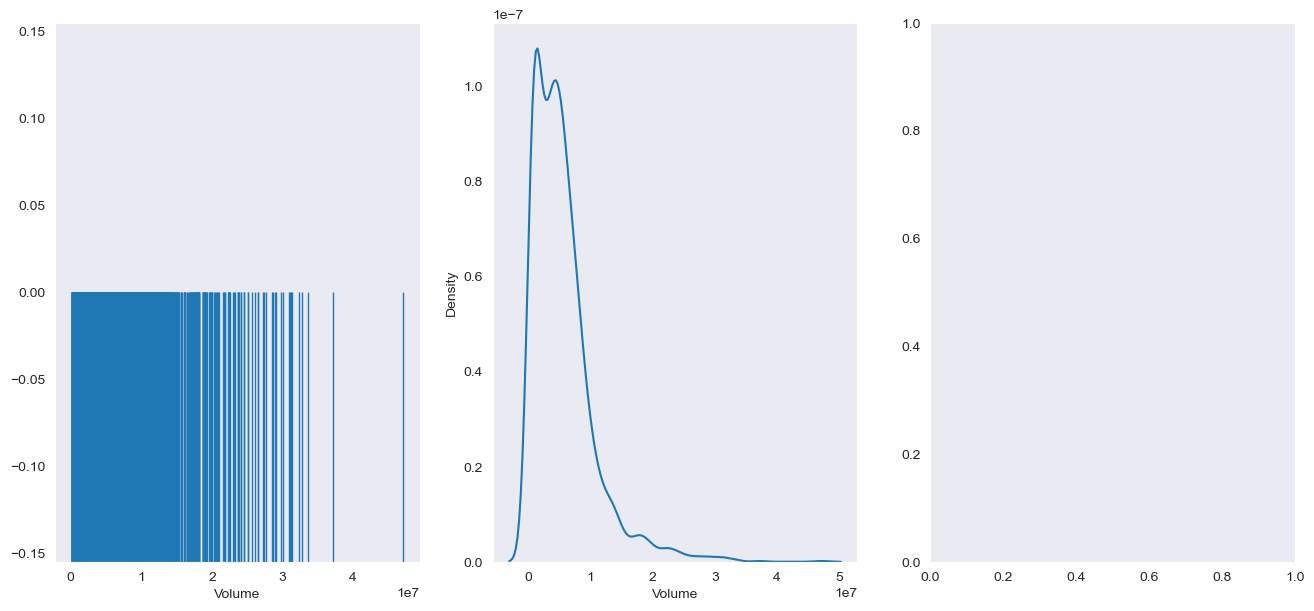

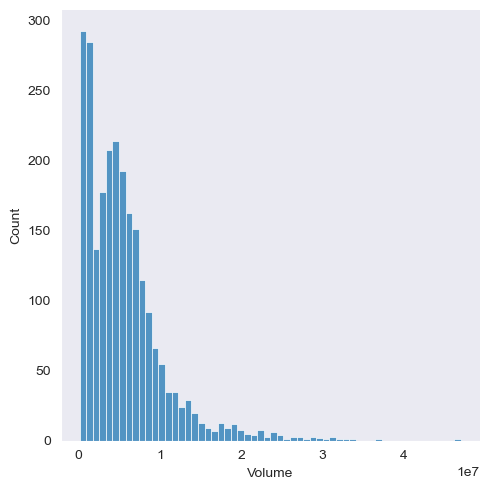

In [22]:
fig , axes = plt.subplots(1,3,figsize=(16,7))
sns.rugplot(ax = axes[0], data=df, x="Volume", height=0.5)
sns.kdeplot(ax = axes[1], data=df, x="Volume")
sns.displot(ax = axes[2], data=df, x="Volume")

<Axes: xlabel='Volume'>

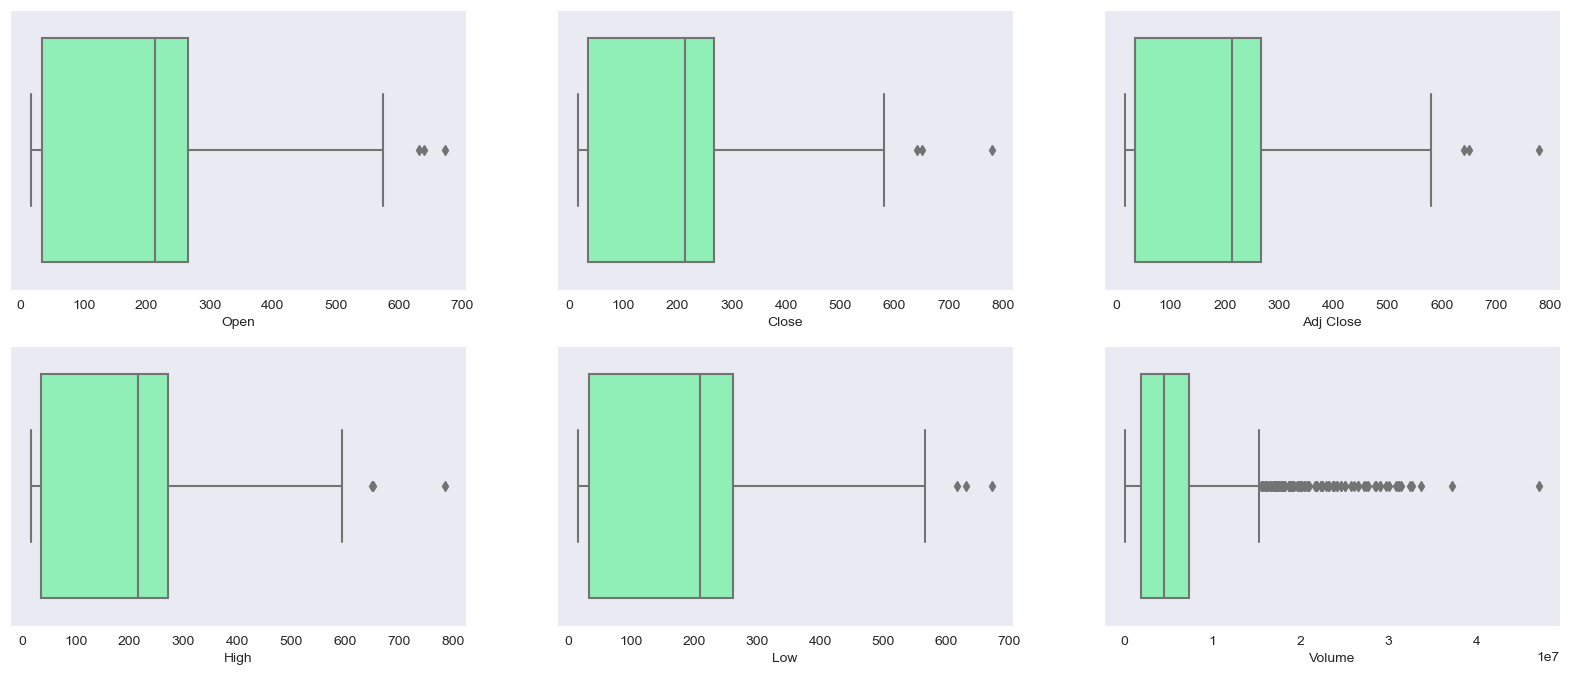

In [23]:
#Analysis of the numerical features 
fig=plt.figure(figsize=(20,8))
ax=[None for _ in range(6)]
ax[0]=plt.subplot2grid((2,3),(0,0))
ax[1]=plt.subplot2grid((2,3),(0,1))
ax[2]=plt.subplot2grid((2,3),(0,2))
ax[3]=plt.subplot2grid((2,3),(1,0))
ax[4]=plt.subplot2grid((2,3),(1,1))
ax[5]=plt.subplot2grid((2,3),(1,2))

sns.boxplot(x='Open',data=df,palette='rainbow',ax=ax[0])
sns.boxplot(x='Close',data=df,palette='rainbow',ax=ax[1])
sns.boxplot(x='Adj Close',data=df,palette='rainbow',ax=ax[2])
sns.boxplot(x='High',data=df,palette='rainbow',ax=ax[3])
sns.boxplot(x='Low',data=df,palette='rainbow',ax=ax[4])
sns.boxplot(x='Volume',data=df,palette='rainbow',ax=ax[5])


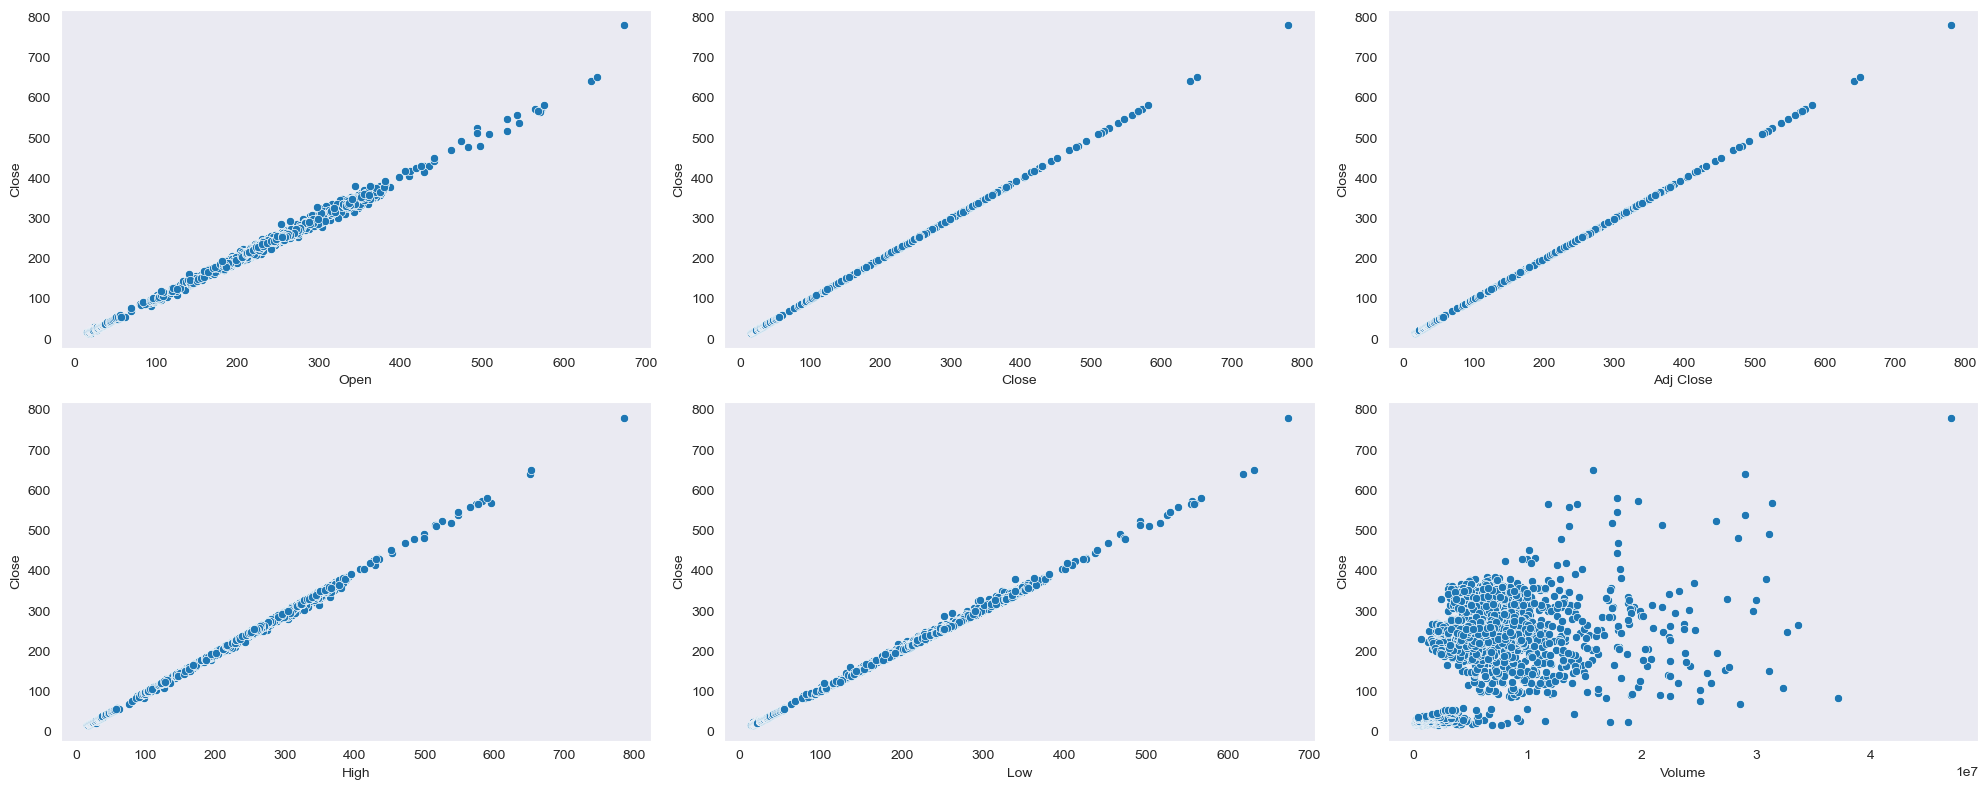

In [24]:
#bivariate analysis: to see how the other features are correlated with delivery time 'Close'
fig=plt.figure(figsize=(20,8))
ax=[None for _ in range(6)]
ax[0]=plt.subplot2grid((2,3),(0,0))
ax[1]=plt.subplot2grid((2,3),(0,1))
ax[2]=plt.subplot2grid((2,3),(0,2))
ax[3]=plt.subplot2grid((2,3),(1,0))
ax[4]=plt.subplot2grid((2,3),(1,1))
ax[5]=plt.subplot2grid((2,3),(1,2))

sns.scatterplot(x='Open',y='Close',data=df,ax=ax[0])
sns.scatterplot(x='Close',y='Close',data=df,ax=ax[1])
sns.scatterplot(x='Adj Close',y='Close',data=df,ax=ax[2])
sns.scatterplot(x='High',y='Close',data=df,ax=ax[3])
sns.scatterplot(x='Low',y='Close',data=df,ax=ax[4])
sns.scatterplot(x='Volume',y='Close',data=df,ax=ax[5])
plt.tight_layout()

# DEALING WITH OUTLIERS

### open column 

In [25]:
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    iqr = q3 - q1
    
    outliers = df[((df<(q1-1.5*iqr))| (df>(q3 + 1.5*iqr)))]
    return outliers


outliers = find_outliers_IQR(df['Open'])
print ('number of outliers'+str(len(outliers)))
print ('max outliers value'+str(outliers.max()))
print ('min outliers value'+str(outliers.min()))


df["Open"].describe()

number of outliers3
max outliers value673.690002
min outliers value632.419983


count    2416.000000
mean      186.271147
std       118.740163
min        16.139999
25%        34.342498
50%       213.035004
75%       266.450012
max       673.690002
Name: Open, dtype: float64

In [26]:
df.drop(index=outliers.index,inplace=True)

outliers = find_outliers_IQR(df['Open'])
print ('number of outliers'+str(len(outliers)))
print ('max outliers value'+str(outliers.max()))
print ('min outliers value'+str(outliers.min()))

df["Open"].describe()

number of outliers0
max outliers valuenan
min outliers valuenan


count    2413.000000
mean      185.696221
std       117.686266
min        16.139999
25%        34.320000
50%       212.949997
75%       266.250000
max       575.690002
Name: Open, dtype: float64

### close column 

In [27]:
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    iqr = q3 - q1
    
    outliers = df[((df<(q1-1.5*iqr))| (df>(q3 + 1.5*iqr)))]
    return outliers


outliers = find_outliers_IQR(df['Close'])
print ('number of outliers'+str(len(outliers)))
print ('max outliers value'+str(outliers.max()))
print ('min outliers value'+str(outliers.min()))


df["Close"].describe()

number of outliers0
max outliers valuenan
min outliers valuenan


count    2413.000000
mean      185.776975
std       117.854296
min        15.800000
25%        34.400002
50%       212.940002
75%       266.380005
max       580.989990
Name: Close, dtype: float64

In [28]:
df.drop(index=outliers.index,inplace=True)

outliers = find_outliers_IQR(df['Close'])
print ('number of outliers'+str(len(outliers)))
print ('max outliers value'+str(outliers.max()))
print ('min outliers value'+str(outliers.min()))

df["Close"].describe()

number of outliers0
max outliers valuenan
min outliers valuenan


count    2413.000000
mean      185.776975
std       117.854296
min        15.800000
25%        34.400002
50%       212.940002
75%       266.380005
max       580.989990
Name: Close, dtype: float64

### high column 

In [29]:
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    iqr = q3 - q1
    
    outliers = df[((df<(q1-1.5*iqr))| (df>(q3 + 1.5*iqr)))]
    return outliers


outliers = find_outliers_IQR(df['High'])
print ('number of outliers'+str(len(outliers)))
print ('max outliers value'+str(outliers.max()))
print ('min outliers value'+str(outliers.min()))


df["High"].describe()

number of outliers0
max outliers valuenan
min outliers valuenan


count    2413.000000
mean      188.947770
std       119.615734
min        16.629999
25%        34.889999
50%       216.720001
75%       270.500000
max       594.500000
Name: High, dtype: float64

In [30]:
df.drop(index=outliers.index,inplace=True)

outliers = find_outliers_IQR(df['High'])
print ('number of outliers'+str(len(outliers)))
print ('max outliers value'+str(outliers.max()))
print ('min outliers value'+str(outliers.min()))

df["High"].describe()

number of outliers0
max outliers valuenan
min outliers valuenan


count    2413.000000
mean      188.947770
std       119.615734
min        16.629999
25%        34.889999
50%       216.720001
75%       270.500000
max       594.500000
Name: High, dtype: float64

### low column 

In [31]:
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    iqr = q3 - q1
    
    outliers = df[((df<(q1-1.5*iqr))| (df>(q3 + 1.5*iqr)))]
    return outliers


outliers = find_outliers_IQR(df['Low'])
print ('number of outliers'+str(len(outliers)))
print ('max outliers value'+str(outliers.max()))
print ('min outliers value'+str(outliers.min()))


df["Low"].describe()

number of outliers0
max outliers valuenan
min outliers valuenan


count    2413.000000
mean      182.346689
std       115.802755
min        14.980000
25%        33.580002
50%       208.800003
75%       262.000000
max       567.429993
Name: Low, dtype: float64

In [32]:
df.drop(index=outliers.index,inplace=True)

outliers = find_outliers_IQR(df['Low'])
print ('number of outliers'+str(len(outliers)))
print ('max outliers value'+str(outliers.max()))
print ('min outliers value'+str(outliers.min()))

df["Low"].describe()

number of outliers0
max outliers valuenan
min outliers valuenan


count    2413.000000
mean      182.346689
std       115.802755
min        14.980000
25%        33.580002
50%       208.800003
75%       262.000000
max       567.429993
Name: Low, dtype: float64

### volume column 

In [33]:
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    iqr = q3 - q1
    
    outliers = df[((df<(q1-1.5*iqr))| (df>(q3 + 1.5*iqr)))]
    return outliers


outliers = find_outliers_IQR(df['Volume'])
print ('number of outliers'+str(len(outliers)))
print ('max outliers value'+str(outliers.max()))
print ('min outliers value'+str(outliers.min()))


df["Volume"].describe()

number of outliers107
max outliers value37163900
min outliers value15594600


count    2.413000e+03
mean     5.541610e+06
std      4.891228e+06
min      1.185000e+05
25%      1.893200e+06
50%      4.573000e+06
75%      7.352100e+06
max      3.716390e+07
Name: Volume, dtype: float64

In [34]:
df.drop(index=outliers.index,inplace=True)

outliers = find_outliers_IQR(df['Volume'])
print ('number of outliers'+str(len(outliers)))
print ('max outliers value'+str(outliers.max()))
print ('min outliers value'+str(outliers.min()))

df["Volume"].describe()

number of outliers11
max outliers value15354700
min outliers value14785500


count    2.306000e+03
mean     4.802228e+06
std      3.414670e+06
min      1.185000e+05
25%      1.714500e+06
50%      4.354100e+06
75%      6.932275e+06
max      1.535470e+07
Name: Volume, dtype: float64

# Data Prepration

In [35]:
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)

In [36]:
print(scaled)

[[1.59786487e-02 1.65839570e-02 9.74037900e-03 1.11776424e-02
  1.11776424e-02 5.31648311e-01]
 [1.23717306e-02 1.15498608e-02 6.86797806e-03 6.16948077e-03
  6.16948077e-03 3.29563802e-01]
 [6.96135360e-03 6.01592525e-03 1.56508925e-03 5.62513131e-04
  5.62513131e-04 4.42918838e-01]
 ...
 [1.00000000e+00 9.94733812e-01 9.92966292e-01 9.96225700e-01
  9.96225700e-01 9.34294640e-01]
 [9.48348907e-01 9.77917819e-01 9.65383930e-01 9.83886765e-01
  9.83886765e-01 8.85365117e-01]
 [9.96140571e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 7.65939014e-01]]


# Seperating Target variables and features

In [37]:
# Target Variable
y = df["Close"]

# Features
x = df.drop(["Close","Adj Close"],axis=1)

# Spliting the data in 80%, 20% for training and testing


In [38]:
from sklearn.model_selection import train_test_split

xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2)

# LinearRegression Model

In [39]:
from sklearn.linear_model import LinearRegression

# Making the model using LinearRegression()
model = LinearRegression()

# Fiting the training data in the model
model.fit(xTrain,yTrain)

LinearRegression()

# Predict the Model

In [40]:
y_pred=model.predict(xTest)

In [41]:
y_pred[:5]

array([ 49.54161989, 164.74164159,  31.44914497, 292.54497138,
       316.86685988])

# Coeficient Matrix (Find the coefficients)

In [42]:
model.coef_

array([-5.97142355e-01,  8.35525526e-01,  7.60355392e-01,  2.26395696e-08])

In [43]:
pd.DataFrame(model.coef_, x.columns, columns=['coef'] )

,coef
Open,-5.971424e-01
High,8.355255e-01
Low,7.603554e-01
Volume,2.263957e-08


# Evalutaing the Model (Find the error (MSE) of the model)

In [44]:
from sklearn import metrics

In [45]:
MAE = metrics.mean_absolute_error(yTest, y_pred)
MSE = metrics.mean_squared_error(yTest, y_pred)
RMSE = np.sqrt(MSE)

In [46]:
MAE

1.2692069151902743

In [47]:
MSE

3.309937447824894

In [48]:
RMSE

1.819323348892355

# Residuals (Difference between y_test and y_pred)

In [49]:
test_residuals=yTest-y_pred

In [50]:
test_residuals[:5]

709     0.888380
836    -0.241642
410     0.040855
2159    3.835034
1862   -1.816872
Name: Close, dtype: float64

# R2 Score

In [51]:
from sklearn.metrics import r2_score
score =r2_score(yTest, y_pred)
print("The accuracy of our model is {}%".format(score))

The accuracy of our model is 0.9997591847846493%


# Cross_validation

In [52]:
from sklearn.model_selection import cross_val_score


print(cross_val_score(model, xTrain, yTrain, cv=3))

[0.99972713 0.99970623 0.99973008]
